In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random

In [2]:
import networkx as nx

## ネットワーク基礎構成部分

In [3]:
# パケットの定義
class Packet:
    def __init__(self, source, destination, data):
        self.source = source # 送信元
        self.destination = destination # 宛先
        self.data = data # データ

# ノードの実装
class Node:
    def __init__(self, id, router, graph, pos):
        self.id: int = id # ノードの識別ID
        self.router: Router = router # ルーター
        self.graph: nx.Graph = graph # グラフ
        self.pos: dict = pos # 座標

    def send_packet(self, destination, data):
        packet = Packet(self.id, destination, data)
        # グラフ上で送信ノードをハイライト表示
        self.highlight_node(self.id, 'green')
        return self.router.forward_packet(packet, self)

    def receive_packet(self, packet):
        # グラフ上で受信ノードをハイライト表示
        self.highlight_node(self.id, 'blue')
        print(f"Node {self.id} received packet from Node {packet.source}: {packet.data}")

    def highlight_node(self, node_id, color):
        # グラフ上で特定のノードをハイライト表示する関数
        nx.draw_networkx_nodes(self.graph, self.pos, nodelist=[node_id], node_color=color)
        plt.draw()
        plt.pause(0.5)  # 描画のための一時停止

class Router:
    def __init__(self, routing_algorithm, graph, pos):
        self.connections = {} # 各ノードIDに対応するNodeインスタンスを格納する辞書
        self.routing_algorithm = routing_algorithm # パケットをルーティングするためのアルゴリズム関数
        self.graph: nx.Graph = graph # ネットワークトポロジーを表すNetworkXのグラフオブジェクト
        self.pos: dict = pos # 各ノードの位置情報を格納する辞書

    def connect(self, node):
        self.connections[node.id] = node

    def forward_packet(self, packet, source_node):
        if self.routing_algorithm(self, packet):
            # パケットが正常に送信された場合、エッジをハイライト表示
            self.highlight_edge(source_node.id, packet.destination, 'green')
            return True
        else:
            # パケット送信に失敗した場合、エッジをハイライト表示
            self.highlight_edge(source_node.id, packet.destination, 'red')
            return False
    def forward_packet_central(self, packet):
        # コントローラーから経路を取得してパケットを転送
        route = self.controller.get_route(packet.source, packet.destination)
        # ルートに従ってパケットを次のノードに転送するロジック
        pass

    def direct_routing(self, packet):
        if packet.destination in self.connections:
            self.connections[packet.destination].receive_packet(packet)
            return True
        else:
            print(f"No route to destination {packet.destination}")
            return False

    def random_routing(self, packet):
        # ランダムルーティングはランダムな目的地を選びます。
        destination = random.choice(list(self.connections.keys()))
        self.connections[destination].receive_packet(packet)
        return True

    def highlight_edge(self, source, destination, color):
        # グラフ上で特定のエッジをハイライト表示する関数
        nx.draw_networkx_edges(self.graph, self.pos, edgelist=[(source, destination)], edge_color=color, width=2)
        plt.draw()
        plt.pause(0.5)  # 描画のための一時停止

class CentralController:
    def __init__(self, graph):
        self.graph = graph
        self.routes = {}

    def update_topology(self, edges):
        # ネットワークトポロジの更新処理
        pass

    def compute_routes(self):
        # ルーティングアルゴリズムを使用して経路を計算
        pass

    def get_route(self, source, destination):
        # 指定されたソースとデスティネーションの間の経路を返す
        return self.routes.get((source, destination))

In [20]:
# パケットの定義
class Packet:
    def __init__(self, source, destination, data):
        self.source = source # 送信元
        self.destination = destination # 宛先
        self.data = data # データ

# ノードの実装
class Node:
    def __init__(self, id, router, graph, pos):
        self.id: int = id # ノードの識別ID
        self.router: Router = router # ルーター
        self.graph: nx.Graph = graph # グラフ
        self.pos: dict = pos # 座標

    def send_packet(self, destination, data):
        packet = Packet(self.id, destination, data)
        # グラフ上で送信ノードをハイライト表示
        self.highlight_node(self.id, 'green')
        return self.router.forward_packet(packet, self)

    def receive_packet(self, packet):
        # グラフ上で受信ノードをハイライト表示
        self.highlight_node(self.id, 'blue')
        print(f"Node {self.id} received packet from Node {packet.source}: {packet.data}")

    def highlight_node(self, node_id, color):
        # グラフ上で特定のノードをハイライト表示する関数
        nx.draw_networkx_nodes(self.graph, self.pos, nodelist=[node_id], node_color=color)
        plt.draw()
        plt.pause(0.5)  # 描画のための一時停止

class Router:
    def __init__(self, routing_algorithm, graph, pos):
        self.connections = {} # 各ノードIDに対応するNodeインスタンスを格納する辞書
        self.routing_algorithm = routing_algorithm # パケットをルーティングするためのアルゴリズム関数
        self.graph: nx.Graph = graph # ネットワークトポロジーを表すNetworkXのグラフオブジェクト
        self.pos: dict = pos # 各ノードの位置情報を格納する辞書

    def connect(self, node):
        self.connections[node.id] = node

    def forward_packet(self, packet, source_node):
        if self.routing_algorithm(self, packet):
            # パケットが正常に送信された場合、エッジをハイライト表示
            self.highlight_edge(source_node.id, packet.destination, 'green')
            return True
        else:
            # パケット送信に失敗した場合、エッジをハイライト表示
            self.highlight_edge(source_node.id, packet.destination, 'red')
            return False
    def forward_packet_central(self, packet):
        # コントローラーから経路を取得してパケットを転送
        route = self.controller.get_route(packet.source, packet.destination)
        # ルートに従ってパケットを次のノードに転送するロジック
        pass

    def direct_routing(self, packet):
        if packet.destination in self.connections:
            self.connections[packet.destination].receive_packet(packet)
            return True
        else:
            print(f"No route to destination {packet.destination}")
            return False

    def random_routing(self, packet):
        # ランダムルーティングはランダムな目的地を選びます。
        destination = random.choice(list(self.connections.keys()))
        self.connections[destination].receive_packet(packet)
        return True

    def highlight_edge(self, source, destination, color):
        # グラフ上で特定のエッジをハイライト表示する関数
        nx.draw_networkx_edges(self.graph, self.pos, edgelist=[(source, destination)], edge_color=color, width=2)
        plt.draw()
        plt.pause(0.5)  # 描画のための一時停止

class CentralController:
    def __init__(self, graph):
        self.graph = graph
        self.routes = {}

    def update_topology(self, edges):
        # ネットワークトポロジの更新処理
        pass

    def compute_routes(self):
        # ルーティングアルゴリズムを使用して経路を計算
        pass

    def get_route(self, source, destination):
        # 指定されたソースとデスティネーションの間の経路を返す
        return self.routes.get((source, destination))

# ネットワークトポロジーの作成
G = nx.Graph()
# ここでノードとエッジを追加
nodes = [i for i in range(7)]

# NetworkXグラフを用意して、位置情報を取得。
G = nx.Graph()
G.add_nodes_from(nodes)
for node in nodes:
    for other_node in nodes:
        if node < other_node:
            G.add_edge(node, other_node)
pos = nx.spring_layout(G)  # ノードの位置を決定するレイアウトアルゴリズム

# コントローラーの作成
controller = CentralController(G)

# ルーターの作成
routers = [Router(i, controller) for i in range(5)]

# パケットの生成と転送
packet = Packet(source='A', destination='B', data='Hello, World!')
routers[0].forward_packet(packet)

TypeError: __init__() missing 1 required positional argument: 'pos'

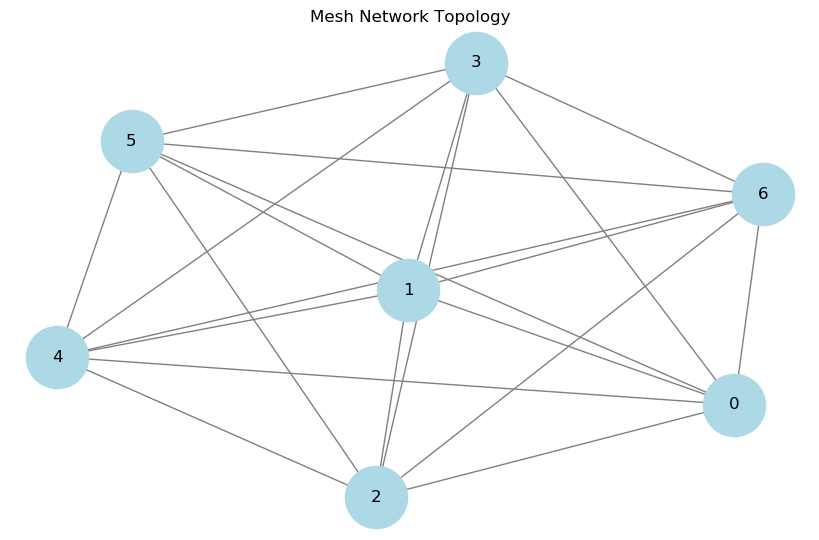

In [15]:
nodes = [i for i in range(7)]

# NetworkXグラフを用意して、位置情報を取得。
G = nx.Graph()
G.add_nodes_from(nodes)
for node in nodes:
    for other_node in nodes:
        if node < other_node:
            G.add_edge(node, other_node)
pos = nx.spring_layout(G)  # ノードの位置を決定するレイアウトアルゴリズム

# matplotlibを使ってグラフを描画。
plt.ion()  # インタラクティブモードをオンにする
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000)
plt.title('Mesh Network Topology')
plt.show()

In [16]:
# pos

{0: array([ 0.81100059, -0.57652971]),
 1: array([-0.03233716, -0.05466373]),
 2: array([-0.11724534, -1.        ]),
 3: array([0.14346893, 0.98330979]),
 4: array([-0.94072791, -0.35877976]),
 5: array([-0.74842893,  0.62398842]),
 6: array([0.88426982, 0.38267498])}

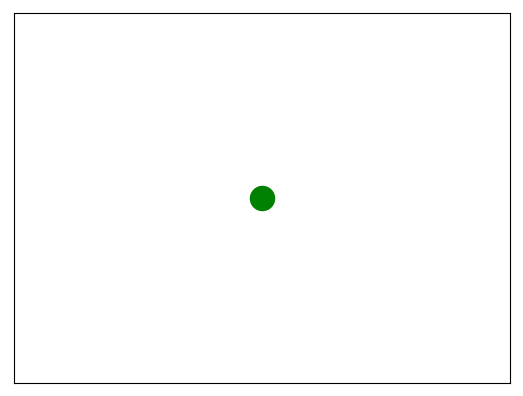

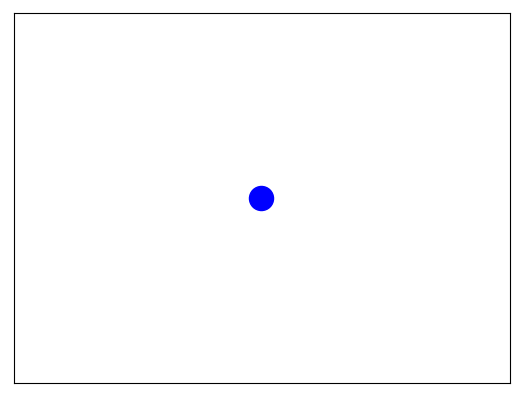

Node 4 received packet from Node 0: Hello, Node 4!


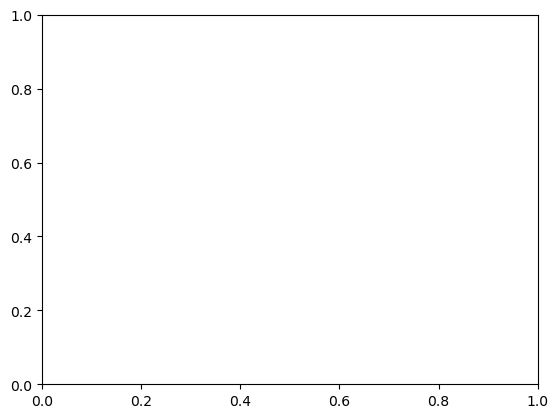

In [18]:
# # Set up the network with routers and nodes
# router = Router(Router.direct_routing, G, pos)  # Instantiate a router with the direct routing algorithm
# nodes = [Node(i, router, G, pos) for i in range(5)]  # Create 5 nodes and associate them with the router

# for node in nodes:
#     router.connect(node)  # Connect each node to the router

# # Simulate packet transmission
# # Let's say node 0 sends a packet to node 4
# source_node = nodes[0]  # Source node (sender)
# destination_id = 4  # Destination node id
# source_node.send_packet(destination_id, "Hello, Node 4!")  # Send a packet from node 0 to node 4

# # In a full simulation, you would have a loop or a series of events that trigger packet sends,
# # routing decisions, and potential network failures. Here, we simply run one event for demonstration.

# # Turn off interactive mode for the final display
# plt.ioff()
# plt.show()  # Show the final state of the graph